In [1]:
import pandas as pd

In [48]:
car_data = pd.read_csv("car-sales.csv")
car_data

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


## Viewing and secting data

In [3]:
car_data.head() # returns the top 5 rows from the DataFrame

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [4]:
car_data.head(7) # specific number

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"


In [5]:
car_data.tail() # bottom 5

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [9]:
# .loc & .iloc

animals = pd.Series(["cat", "dog", "bird", "panda", "snake"], index=[0, 3, 9 , 8, 3])

In [10]:
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [11]:
animals.loc[3] # .loc is short for location

3      dog
3    snake
dtype: object

In [12]:
animals.loc[9]

'bird'

In [13]:
car_data.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [14]:
# .iloc refers to the position - cat=0, dog=1... panda=3...
animals.iloc[3]

'panda'

In [15]:
car_data.iloc[3] # .iloc = index position/location

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [16]:
animals.iloc[:3] # items up to position 3, but not included 3 = slices

0     cat
3     dog
9    bird
dtype: object

In [17]:
car_data["Make"] # select a column

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [18]:
car_data.Colour # select a column - IMPORTANT: IF the column name has a space in it - the dot notation DOESN'T WORK

0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7     Blue
8    White
9    White
Name: Colour, dtype: object

In [20]:
car_data[car_data["Make"] == "Toyota"] # filter - return the data with Toyouta as make

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [21]:
car_data[car_data["Odometer (KM)"] > 100000] # return the cars with more than 100000 KM

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [23]:
pd.crosstab(car_data["Make"], car_data["Doors"]) # crosses the data - we have 1 Toyota with 3 doors, 3 Hondas with 4 doors ...

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [24]:
car_data.groupby(["Make"]).mean() # groups the DataFrame on the Make column and gives the mean values for Odometer and Doors columns

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


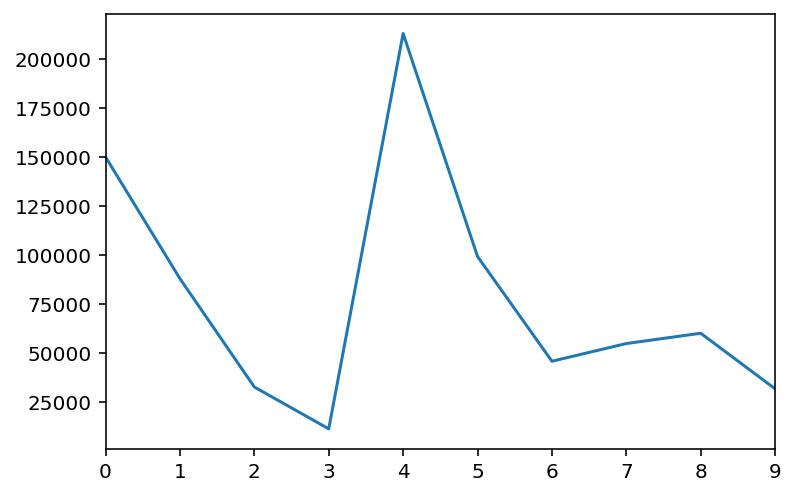

In [25]:
# in case the plot doen't work:
# %matplotlib inline  # magic function (%) in jupyter notebook, so we can see the plot, as this functionality in pandas depends on the matplotlib
# import matplotlib.pyplot as plt

car_data["Odometer (KM)"].plot()

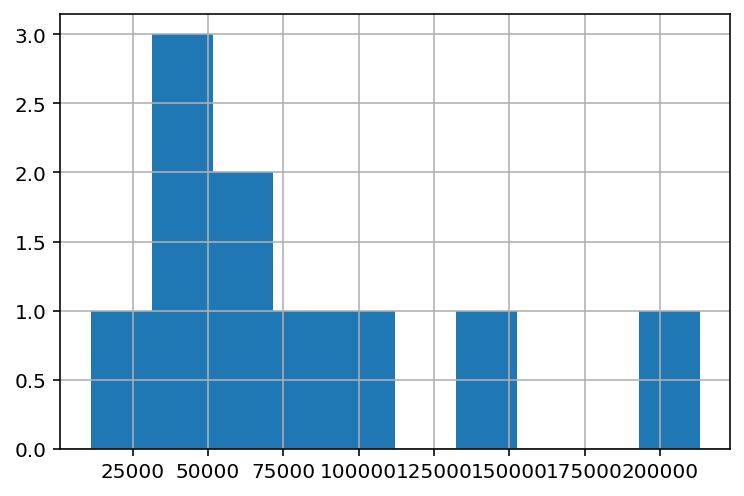

In [26]:
car_data["Odometer (KM)"].hist()

In [27]:
# We can use plot on a numeric values - if we have something else - the data needs to be converted first (if possible of course)
car_data["Price"].dtype

dtype('O')

In [28]:
car_data["Price"].plot()

TypeError: no numeric data to plot

In [49]:
# regex - https://regex101.com/ - matches $,. - then the str[:-2] removes the cents from the ammount - https://repl.it/@DamyanPeykov/Test

car_data["Price"] = car_data["Price"].str.replace('[\$\,\.]','').str[:-2].astype(int)
car_data

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


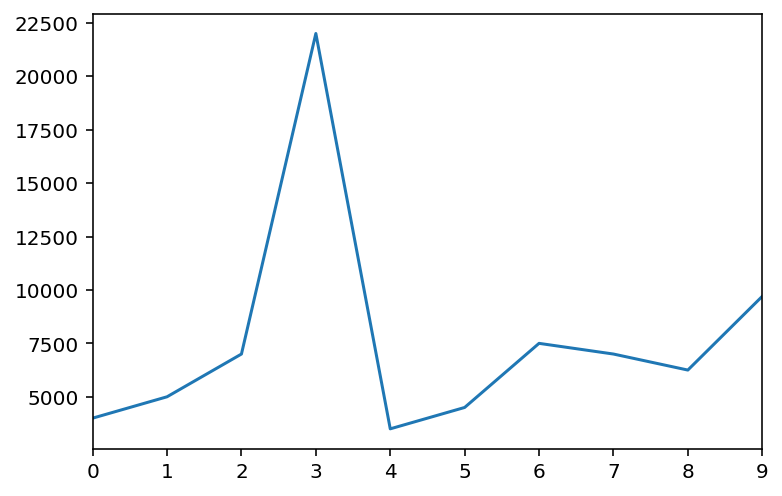

In [50]:
car_data["Price"].plot()